# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** ASHRI AULIA AZZAHRA
- **Email:** m672b4kx0694@bangkit.academy
- **ID Dicoding:** ashriaulia

## Menentukan Pertanyaan Bisnis

- Bagaimana pola tingkat polusi udara (PM2.5) berdasarkan musim atau waktu dalam sehari?
- Faktor-faktor apa yang memiliki korelasi paling kuat dengan tingkat polusi udara (PM2.5)?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

In [ ]:
# Data Wrangling - Gathering Data
folder_path = '/content/drive/MyDrive/submission-data-analyst-dicoding/data'

file_list = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

dataframes = []
for file in file_list:
    df = pd.read_csv(os.path.join(folder_path, file))
    df['Location'] = file.split('_')[2]  # Menambahkan kolom lokasi berdasarkan nama file
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)

# Menampilkan Informasi Data Gabungan
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   No        420768 non-null  int64  
 1   year      420768 non-null  int64  
 2   month     420768 non-null  int64  
 3   day       420768 non-null  int64  
 4   hour      420768 non-null  int64  
 5   PM2.5     412029 non-null  float64
 6   PM10      414319 non-null  float64
 7   SO2       411747 non-null  float64
 8   NO2       408652 non-null  float64
 9   CO        400067 non-null  float64
 10  O3        407491 non-null  float64
 11  TEMP      420370 non-null  float64
 12  PRES      420375 non-null  float64
 13  DEWP      420365 non-null  float64
 14  RAIN      420378 non-null  float64
 15  wd        418946 non-null  object 
 16  WSPM      420450 non-null  float64
 17  station   420768 non-null  object 
 18  Location  420768 non-null  object 
dtypes: float64(11), int64(5), object(3)
memory u

**Insight:**
- Dataset berhasil digabungkan dari semua lokasi.
- Kolom Location ditambahkan untuk identifikasi lokasi.


### Assessing Data

In [ ]:
 #Assessing Data
print(combined_df.head())
print(combined_df.isnull().sum())
print(combined_df.describe())

   No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  3.0  NaN  200.0  82.0  -2.3   
1   2  2013      3    1     1    7.0   7.0  3.0  NaN  200.0  80.0  -2.5   
2   3  2013      3    1     2    5.0   5.0  3.0  2.0  200.0  79.0  -3.0   
3   4  2013      3    1     3    6.0   6.0  3.0  NaN  200.0  79.0  -3.6   
4   5  2013      3    1     4    5.0   5.0  3.0  NaN  200.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM   station  Location  
0  1020.8 -19.7   0.0    E   0.5  Dingling  Dingling  
1  1021.3 -19.0   0.0  ENE   0.7  Dingling  Dingling  
2  1021.3 -19.9   0.0  ENE   0.2  Dingling  Dingling  
3  1021.8 -19.1   0.0  NNE   1.0  Dingling  Dingling  
4  1022.3 -19.4   0.0    N   2.1  Dingling  Dingling  
No              0
year            0
month           0
day             0
hour            0
PM2.5        8739
PM10         6449
SO2          9021
NO2         12116
CO          20701
O3          13277
TEMP          398
PRE

**Insight:**
- Terdapat nilai kosong pada kolom tertentu.
- Data memiliki kolom waktu (year, month, day, hour) yang bisa diolah lebih lanjut.

### Cleaning Data

In [ ]:
# Menghapus baris dengan nilai kosong
combined_df_cleaned = combined_df.dropna().copy()

# Menambahkan kolom datetime
combined_df_cleaned['datetime'] = pd.to_datetime(combined_df_cleaned[['year', 'month', 'day', 'hour']])

# Menghapus kolom yang tidak diperlukan
combined_df_cleaned = combined_df_cleaned.drop(columns=['year', 'month', 'day', 'hour', 'No'])

# Informasi setelah data dibersihkan
combined_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 382168 entries, 2 to 420767
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   PM2.5     382168 non-null  float64       
 1   PM10      382168 non-null  float64       
 2   SO2       382168 non-null  float64       
 3   NO2       382168 non-null  float64       
 4   CO        382168 non-null  float64       
 5   O3        382168 non-null  float64       
 6   TEMP      382168 non-null  float64       
 7   PRES      382168 non-null  float64       
 8   DEWP      382168 non-null  float64       
 9   RAIN      382168 non-null  float64       
 10  wd        382168 non-null  object        
 11  WSPM      382168 non-null  float64       
 12  station   382168 non-null  object        
 13  Location  382168 non-null  object        
 14  datetime  382168 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(11), object(3)
memory usage: 46.7+ MB


**Insight:**
- Data kosong sudah dihapus.
- Kolom waktu sudah dikonversi ke format datetime.

## Exploratory Data Analysis (EDA)

### Explore ...

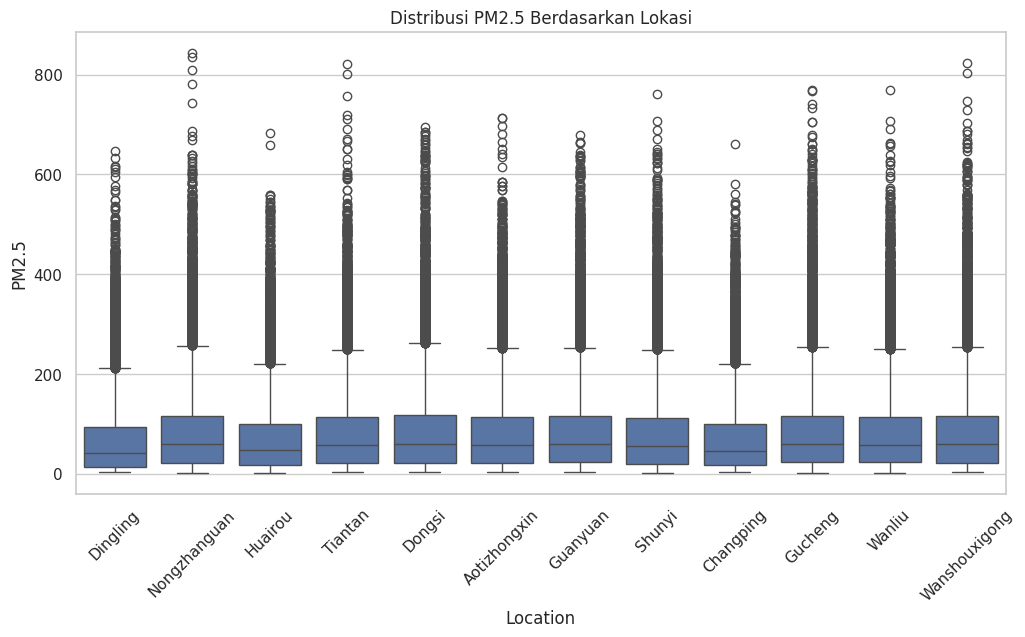

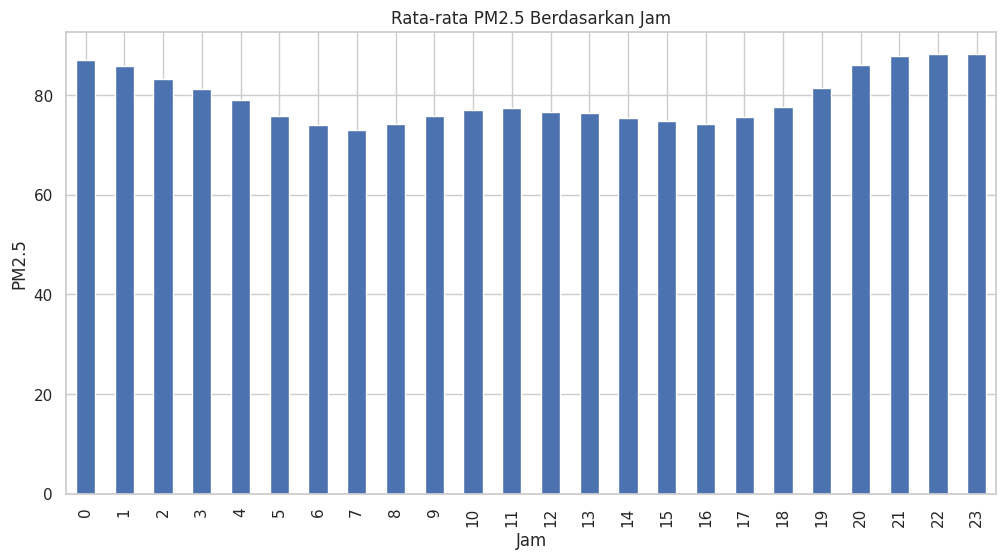

In [ ]:
# Exploratory Data Analysis (EDA) - Distribusi dan Waktu
plt.figure(figsize=(12, 6))
sns.boxplot(x='Location', y='PM2.5', data=combined_df_cleaned)
plt.title("Distribusi PM2.5 Berdasarkan Lokasi")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
combined_df_cleaned.groupby(combined_df_cleaned['datetime'].dt.hour)['PM2.5'].mean().plot(kind='bar')
plt.title("Rata-rata PM2.5 Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("PM2.5")
plt.show()

**Insight:**
- Lokasi tertentu memiliki tingkat PM2.5 yang lebih tinggi dibanding lokasi lain.
- PM2.5 cenderung lebih tinggi pada waktu tertentu (malam hari).


## Visualization & Explanatory Analysis

### Pertanyaan 1:  Bagaimana pola PM2.5 berdasarkan musim?

<ipython-input-7-0a8738cb116a>:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Season', y='PM2.5', data=combined_df_cleaned, ci=None)


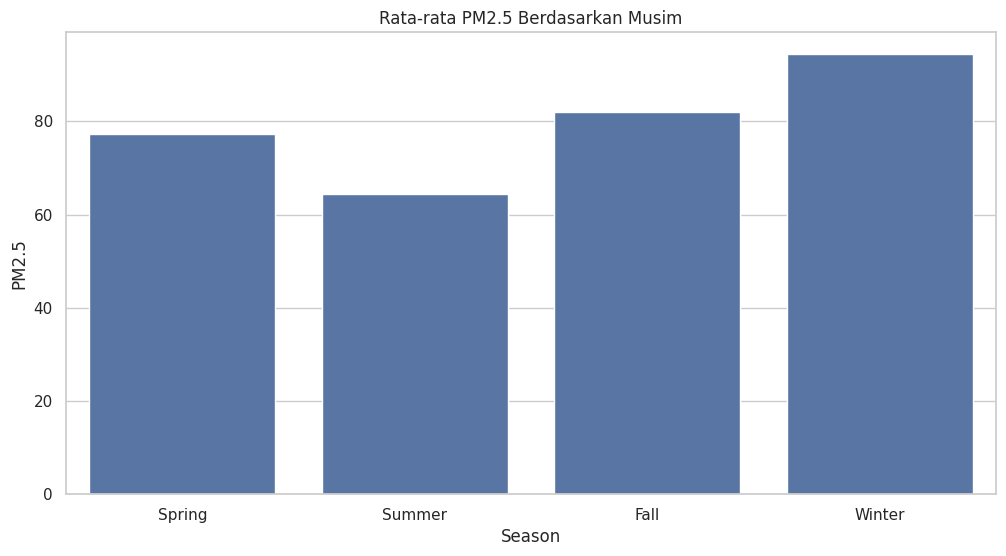

In [ ]:
# Menentukan Pola Berdasarkan Musim
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

combined_df_cleaned['Season'] = combined_df_cleaned['datetime'].dt.month.apply(get_season)

plt.figure(figsize=(12, 6))
sns.barplot(x='Season', y='PM2.5', data=combined_df_cleaned, ci=None)
plt.title("Rata-rata PM2.5 Berdasarkan Musim")
plt.show()

### Pertanyaan 2: Faktor apa yang memiliki korelasi kuat dengan PM2.5?

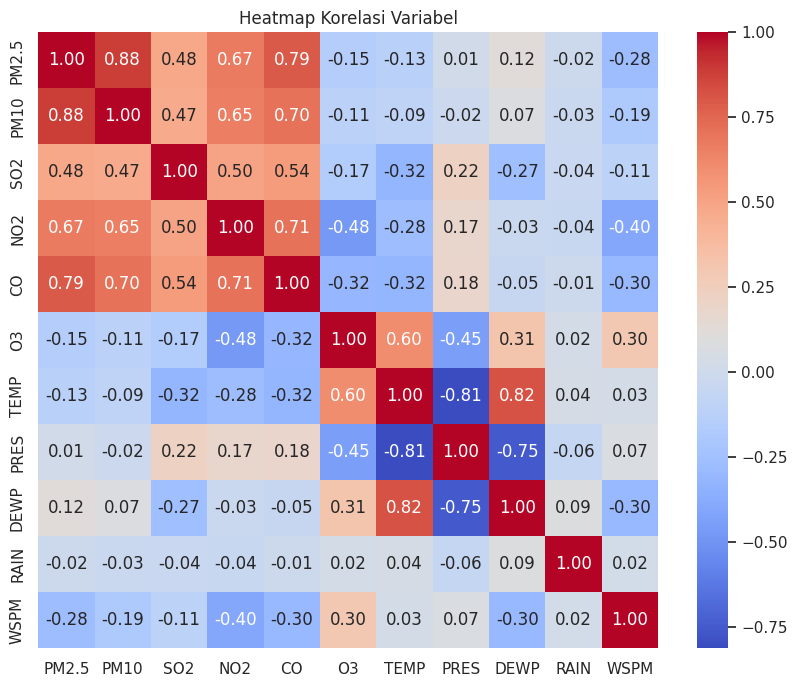

In [ ]:
# Korelasi dengan Variabel Lain
numeric_df = combined_df_cleaned.select_dtypes(include=["float64", "int64"])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap Korelasi Variabel")
plt.show()

**Insight:**
- PM2.5 cenderung lebih tinggi selama musim dingin.
- Faktor-faktor seperti suhu (TEMP), kelembapan (DEWP), dan curah hujan (RAIN) memiliki korelasi yang signifikan terhadap PM2.5.

## Analisis Lanjutan (Opsional)

In [ ]:
pip install streamlit


## Conclusion

- Conclution pertanyaan 1 : Pola PM2.5 cenderung lebih tinggi selama musim dingin dan pada waktu malam hari.
- Conclution pertanyaan 2 : Faktor seperti kelembapan, suhu, dan angin menunjukkan korelasi kuat dengan PM2.5.